In [42]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### 实验内容：使用matlab或python，生成图片lena不同空间分辨率、不同灰度分辨率的图片，比较它们的区别。

In [43]:
#读取并转换为灰度图像
grayImg = cv.cvtColor(cv.imread('lena.jpg'), cv.COLOR_BGR2GRAY)
h = grayImg.shape[0]
w = grayImg.shape[1]

### 降低分辨率和灰度级数对图像质量的影响
+ 对于低复杂度图像，图像中有大面积灰度变化平缓的区域
  + 降低分辨率不会引起细节损失，因而图像质量保持保持较好
  + 减小灰度级数，容易导致灰度平滑区域出现假轮廓，引起图像质量下降；
+ 对于高复杂度图像，图像中细节较多 *（如群众场面）*
  + 降低分辨率容易引起细节损失，导致图像质量下降；
  + 减小灰度级数，不致丢失图像细节，因而图像质量保持较好。

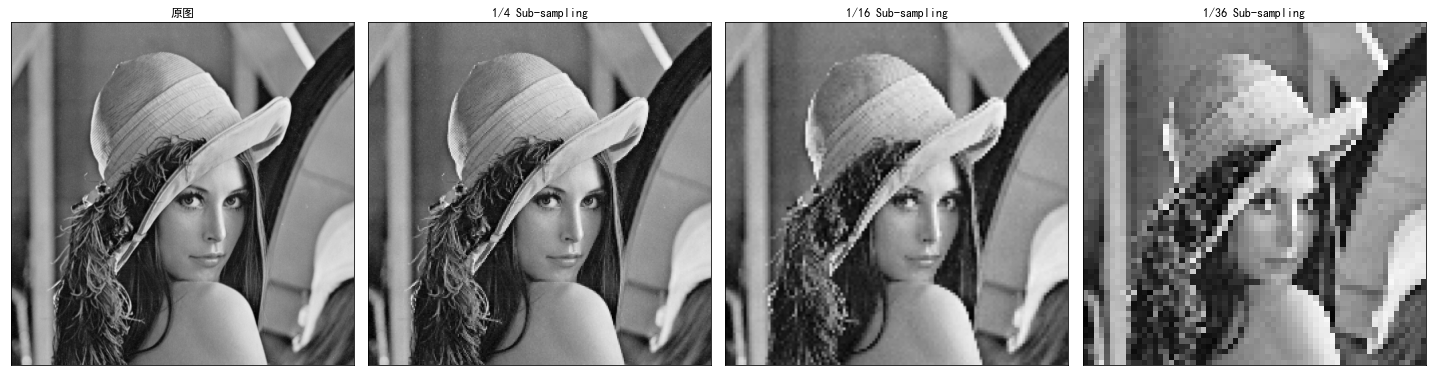

(None, None)

In [44]:
#修改空间分辨率
def change_space(image):
    x, y = image.shape[:2]
    result = np.zeros([x//2, y//2])
    result = image[::2, ::2]
    return result

space_4 = change_space(grayImg)
space_8 = change_space(space_4)
space_16 = change_space(space_8)

#显示
plt.figure(figsize=(20,20))
plt.subplot(141), plt.imshow(grayImg,'gray'), plt.title('原图'), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(space_4,'gray'), plt.title('1/4 Sub-sampling'), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(space_8,'gray'), plt.title('1/16 Sub-sampling'), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(space_16,'gray'), plt.title('1/36 Sub-sampling'), plt.xticks([]), plt.yticks([])
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.tight_layout(), plt.show()

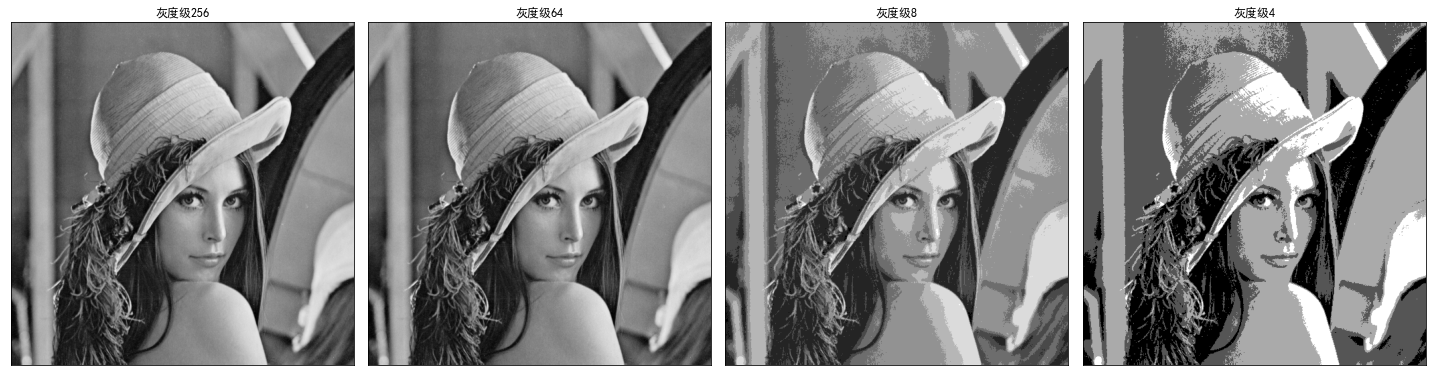

(None, None)

In [45]:
#修改灰度级
"""灰度级64"""
gray_64=np.zeros((h,w),np.uint8)
for i in range(h):
    for j in range(w):
        gray_64[i,j]=np.uint8(int(grayImg[i,j]/4))
"""灰度级8"""
gray_8=np.zeros((h,w),np.uint8)
for i in range(h):
    for j in range(w):
        gray_8[i,j]=np.uint8(int(gray_64[i,j]/8))
"""灰度级4"""
gray_4=np.zeros((h,w),np.uint8)
for i in range(h):
    for j in range(w):
        gray_4[i,j]=np.uint8(int(gray_8[i,j]/2))
#显示
plt.figure(figsize=(20,20))
plt.subplot(141), plt.imshow(grayImg,'gray'), plt.title('灰度级256'), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(gray_64,'gray'), plt.title('灰度级64'), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(gray_8,'gray'), plt.title('灰度级8'), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(gray_4,'gray'), plt.title('灰度级4'), plt.xticks([]), plt.yticks([])
plt.tight_layout(), plt.show()